# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# understanding the data

In [3]:
# read the data
data = pd.read_csv("Hyderabad_House_Data.csv")


In [4]:
# first five rows
data.head()


,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [12]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


In [6]:
data.shape


(1171, 8)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1171 non-null   int64 
 1   Bedrooms    1171 non-null   object
 2   Washrooms   1150 non-null   object
 3   Furnishing  1171 non-null   object
 4   Tennants    1170 non-null   object
 5   Area        1149 non-null   object
 6   Price       1171 non-null   object
 7   Locality    1171 non-null   object
dtypes: int64(1), object(7)
memory usage: 73.3+ KB


In [8]:
data.describe()


,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


In [9]:
data.isnull().sum()


Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

# data preprocessing

In [16]:
## test values convert into numeric values
data['Washrooms'] = pd.to_numeric(data['Washrooms'], errors='coerce')


In [17]:
data['Washrooms'] = data['Washrooms'].fillna(data['Washrooms'].median())



In [18]:
data.isnull().sum()

Unnamed: 0      0
Bedrooms        0
Washrooms       0
Furnishing      0
Tennants        1
Area          134
Price           0
Locality        0
dtype: int64

In [19]:
data['Area'].head(10)


0    1800
1    2500
2     NaN
3    2160
4    1580
5    2600
6    1350
7     NaN
8    1700
9    1150
Name: Area, dtype: object

# Text into numbers extract cheyyali

In [32]:
data['Area'] = data['Area'].astype(str).str.extract('(\d+)')


In [33]:
# now convert into numeric values
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')


In [34]:
data['Area'] = data['Area'].fillna(data['Area'].median())


In [35]:
data[['Washrooms','Area']].isnull().sum()


Washrooms    0
Area         0
dtype: int64

In [ ]:
data['Price'] = (
    data['Price']     
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # removes EVERYTHING except digits
)


In [37]:
# This line converts the cleaned Price column into float values so it can be used for calculations and machine learning models.
data['Price'] = data['Price'].astype(float)


In [38]:
data['Price'].dtype


dtype('float64')

In [39]:
data['Price'].apply(type).value_counts()


Price
<class 'float'>    1171
Name: count, dtype: int64

In [40]:
# Separate again
X = data.drop('Price', axis=1)
y = data['Price']



In [41]:
# Encode
X = pd.get_dummies(X, drop_first=True)



In [42]:

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [43]:

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
print(X_train.dtype)
print(y_train.dtype)


float64
float64


In [46]:
y_pred = model.predict(X_test)


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE : 5422.879233010627
MSE : 53795262.08002099
RMSE: 7334.525347970445
R2 Score: 0.5549493816734247


converts categorical columns into 0/1 columns (one-hot encoding).
Training data X had more columns (like location/furnishing dummies).

Your new house data only has 3 columns.

reindex(columns=X.columns, fill_value=0) adds missing columns and fills them with 0.

Example after reindex:

In [59]:
new_house = pd.DataFrame({
    'Area': [1400],
    'Bedrooms': [6],
    'Washrooms': [3]
})

new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=X.columns, fill_value=0)

new_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_scaled)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 18671.2928592373


Points close to diagonal line → good predictions

Far points → errors or outliers

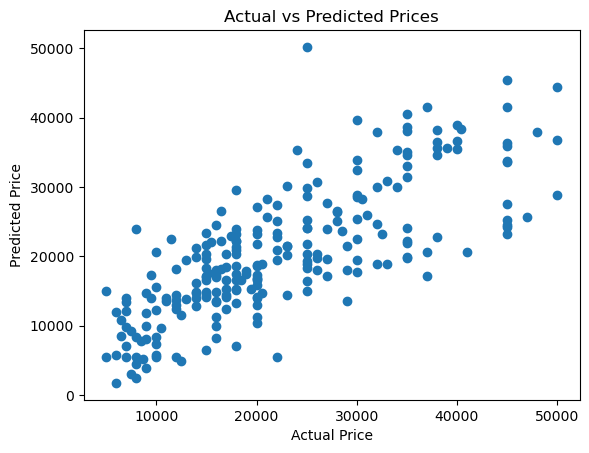

In [56]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()
